# Active User - users_df의 timestamp_first_active 이용

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [2]:
users_df = pd.read_csv('airbnb-recruiting-new-user-bookings/users_df.csv')
sessions_df = pd.read_csv('airbnb-recruiting-new-user-bookings/sessions.csv')
countries_df = pd.read_csv('airbnb-recruiting-new-user-bookings/countries.csv')
age_gender_df = pd.read_csv('airbnb-recruiting-new-user-bookings/age_gender_bkts.csv')

In [3]:
users_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,2014-06-30,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  object 
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      124522 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [5]:
# date_account_created, timestamp_first_active, date_first_booking를 날짜 형식으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'])
users_df['timestamp_first_active'] = pd.to_datetime(users_df['timestamp_first_active'], errors='coerce')
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'], errors='coerce')

# 변환이 제대로 되었는지 확인
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      124522 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

# timestamp_first_active을 기준으로 DAU (Daily Active Users) 구하기

In [6]:
# DAU (Daily Active Users) 계산
dau = users_df.groupby(users_df['timestamp_first_active'].dt.date)['id'].nunique().reset_index()
dau.columns = ['date', 'DAU']
dau

,date,DAU
0,2009-03-19,1
1,2009-05-23,1
2,2009-06-09,1
3,2009-10-31,1
4,2009-12-08,1
...,...,...
1634,2014-06-26,587
1635,2014-06-27,557
1636,2014-06-28,460
1637,2014-06-29,484


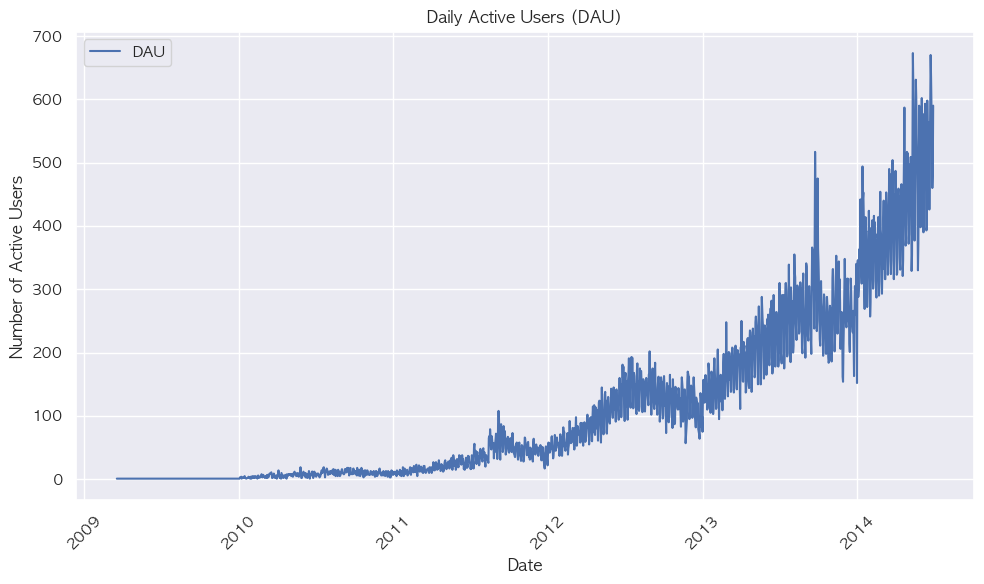

In [7]:
# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(dau['date'], dau['DAU'], linestyle='-', color='b', label='DAU')

# 그래프 제목과 축 레이블 설정
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')

# x 축 날짜 형식 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.grid(True)
plt.legend()
plt.show()

# timestamp_first_active을 기준으로 WAU (Weekly Active Users) 구하기

In [8]:
# WAU (Weekly Active Users) 계산
wau = users_df.groupby(users_df['timestamp_first_active'].dt.to_period('W'))['id'].nunique().reset_index()
wau.columns = ['week', 'WAU']
wau

,week,WAU
0,2009-03-16/2009-03-22,1
1,2009-05-18/2009-05-24,1
2,2009-06-08/2009-06-14,1
3,2009-10-26/2009-11-01,1
4,2009-12-07/2009-12-13,1
...,...,...
236,2014-06-02/2014-06-08,3490
237,2014-06-09/2014-06-15,3536
238,2014-06-16/2014-06-22,3747
239,2014-06-23/2014-06-29,3979


In [9]:
# 주간 기간 문자열을 '/'을 기준으로 분리하여 시작일과 종료일을 추출
wau[['start_date', 'end_date']] = wau['week'].apply(lambda x: pd.Series(str(x).split('/')))
# 시작일과 종료일을 datetime 형식으로 변환
wau['start_date'] = pd.to_datetime(wau['start_date'])
wau['end_date'] = pd.to_datetime(wau['end_date'])
wau

,week,WAU,start_date,end_date
0,2009-03-16/2009-03-22,1,2009-03-16,2009-03-22
1,2009-05-18/2009-05-24,1,2009-05-18,2009-05-24
2,2009-06-08/2009-06-14,1,2009-06-08,2009-06-14
3,2009-10-26/2009-11-01,1,2009-10-26,2009-11-01
4,2009-12-07/2009-12-13,1,2009-12-07,2009-12-13
...,...,...,...,...
236,2014-06-02/2014-06-08,3490,2014-06-02,2014-06-08
237,2014-06-09/2014-06-15,3536,2014-06-09,2014-06-15
238,2014-06-16/2014-06-22,3747,2014-06-16,2014-06-22
239,2014-06-23/2014-06-29,3979,2014-06-23,2014-06-29


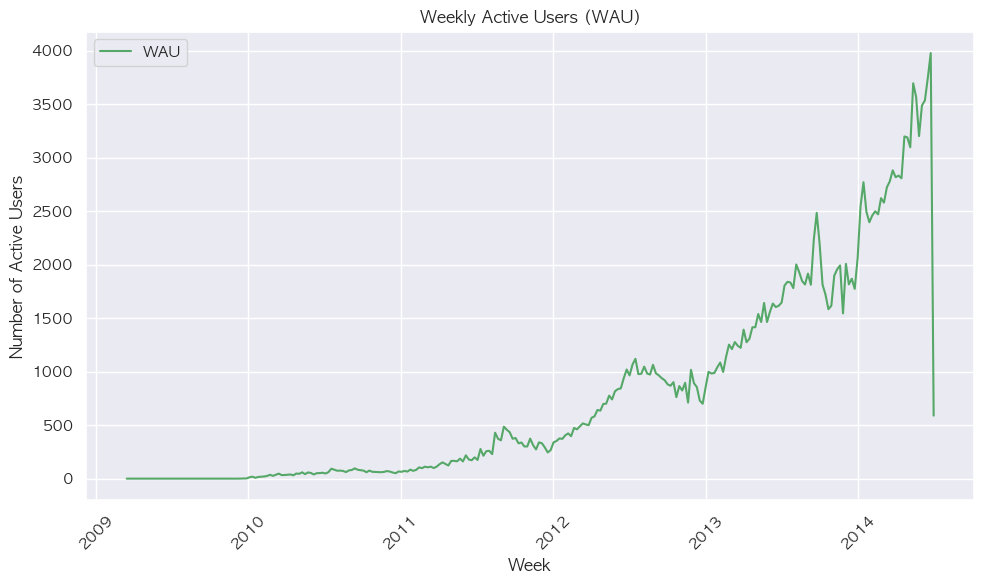

In [10]:
# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(wau['start_date'], wau['WAU'], linestyle='-', color='g', label='WAU')

# 그래프 제목과 축 레이블 설정
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Active Users')

# x 축 날짜 형식 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.grid(True)
plt.legend()
plt.show()

# timestamp_first_active을 기준으로 MAU (Monthly Active Users) 구하기

In [11]:
# MAU (Monthly Active Users) 계산
mau = users_df.groupby(users_df['timestamp_first_active'].dt.to_period('M'))['id'].nunique().reset_index()
mau.columns = ['month', 'MAU']
mau

,month,MAU
0,2009-03,1
1,2009-05,1
2,2009-06,1
3,2009-10,1
4,2009-12,1
5,2010-01,62
6,2010-02,103
7,2010-03,163
8,2010-04,161
9,2010-05,228


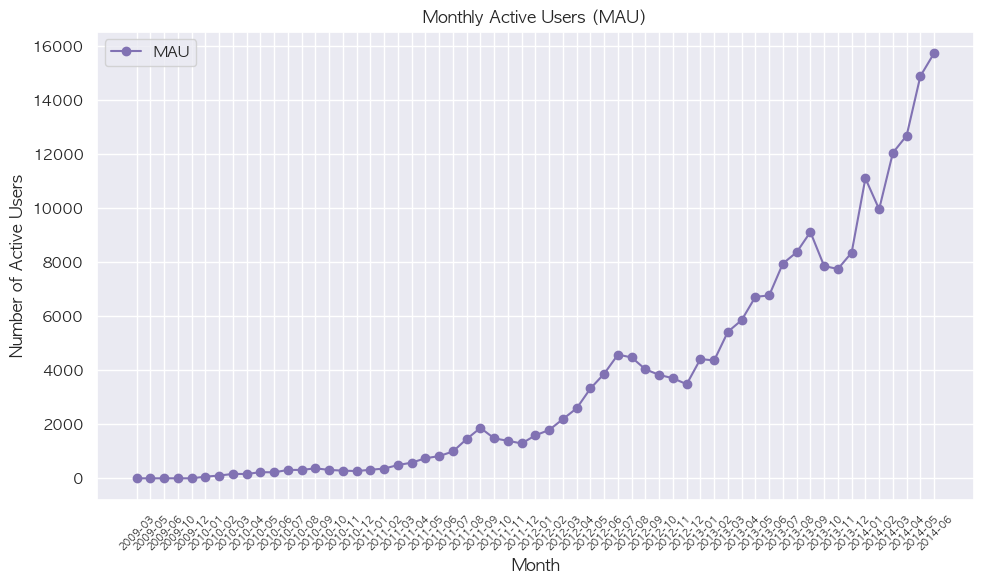

In [12]:
# month 컬럼의 값을 문자열로 변환
mau['month'] = mau['month'].astype(str)

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(mau['month'], mau['MAU'], marker='o', linestyle='-', color='m', label='MAU')

# 그래프 제목과 축 레이블 설정
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')

# x 축 레이블 각도 설정
plt.xticks(rotation=45,fontsize=7)

# 그래프 표시
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------------

# 서비스 고착도(stickiness) 분석
서비스 고착도는 DAU/MAU를 나타내며, 특정 월 동안 얼마나 많은 사용자가 일일 사용자로 활동하는지를 보여준다. 값이 높을수록 사용자가 더 자주 서비스를 이용하고 있음을 나타낸다. 

In [13]:
# 월별로 DAU 평균 계산
dau['date'] = pd.to_datetime(dau['date'])
mau['month'] = pd.to_datetime(mau['month'])

stickiness_df = dau
stickiness_df['month'] = dau['date'].dt.to_period('M').dt.to_timestamp()
stickiness_df

,date,DAU,month
0,2009-03-19,1,2009-03-01
1,2009-05-23,1,2009-05-01
2,2009-06-09,1,2009-06-01
3,2009-10-31,1,2009-10-01
4,2009-12-08,1,2009-12-01
...,...,...,...
1634,2014-06-26,587,2014-06-01
1635,2014-06-27,557,2014-06-01
1636,2014-06-28,460,2014-06-01
1637,2014-06-29,484,2014-06-01


In [14]:
# month 컬럼을 datetime 타입으로 변환
stickiness_df['month'] = pd.to_datetime(stickiness_df['month'])

# 데이터 병합
stickiness_df = pd.merge(stickiness_df, mau, on='month', how='left')
stickiness_df

,date,DAU,month,MAU
0,2009-03-19,1,2009-03-01,1
1,2009-05-23,1,2009-05-01,1
2,2009-06-09,1,2009-06-01,1
3,2009-10-31,1,2009-10-01,1
4,2009-12-08,1,2009-12-01,1
...,...,...,...,...
1634,2014-06-26,587,2014-06-01,15741
1635,2014-06-27,557,2014-06-01,15741
1636,2014-06-28,460,2014-06-01,15741
1637,2014-06-29,484,2014-06-01,15741


In [15]:
# 서비스 고착도 계산
stickiness_df['stickiness'] = (stickiness_df['DAU'] / stickiness_df['MAU']) * 100
stickiness_df

,date,DAU,month,MAU,stickiness
0,2009-03-19,1,2009-03-01,1,100.000000
1,2009-05-23,1,2009-05-01,1,100.000000
2,2009-06-09,1,2009-06-01,1,100.000000
3,2009-10-31,1,2009-10-01,1,100.000000
4,2009-12-08,1,2009-12-01,1,100.000000
...,...,...,...,...,...
1634,2014-06-26,587,2014-06-01,15741,3.729115
1635,2014-06-27,557,2014-06-01,15741,3.538530
1636,2014-06-28,460,2014-06-01,15741,2.922305
1637,2014-06-29,484,2014-06-01,15741,3.074773


In [16]:
# 2009년 이전 데이터 지우기
stickiness_df = stickiness_df[stickiness_df['date'].dt.year != 2009]
stickiness_df

,date,DAU,month,MAU,stickiness
5,2010-01-01,1,2010-01-01,62,1.612903
6,2010-01-02,1,2010-01-01,62,1.612903
7,2010-01-03,1,2010-01-01,62,1.612903
8,2010-01-04,3,2010-01-01,62,4.838710
9,2010-01-05,3,2010-01-01,62,4.838710
...,...,...,...,...,...
1634,2014-06-26,587,2014-06-01,15741,3.729115
1635,2014-06-27,557,2014-06-01,15741,3.538530
1636,2014-06-28,460,2014-06-01,15741,2.922305
1637,2014-06-29,484,2014-06-01,15741,3.074773


In [17]:
# 월별 평균 stickiness 계산
stickiness_monthly = stickiness_df.groupby('month')['stickiness'].mean().reset_index()
stickiness_monthly

,month,stickiness
0,2010-01-01,4.000000
1,2010-02-01,3.703704
2,2010-03-01,3.333333
3,2010-04-01,3.333333
4,2010-05-01,3.225806
5,2010-06-01,3.333333
6,2010-07-01,3.225806
7,2010-08-01,3.225806
8,2010-09-01,3.333333
9,2010-10-01,3.225806


서비스 고착도의 대부분 값이 약 3.2 ~ 3.3 사이에 존재한다. 이는 서비스가 월간 사용자 대비 약 3.2% ~ 3.3%의 일일 활성 사용자를 유지하고 있음을 나타내고 있다. 이는 곧 사용자의 참여도가 안정적임을 알 수 있다. 

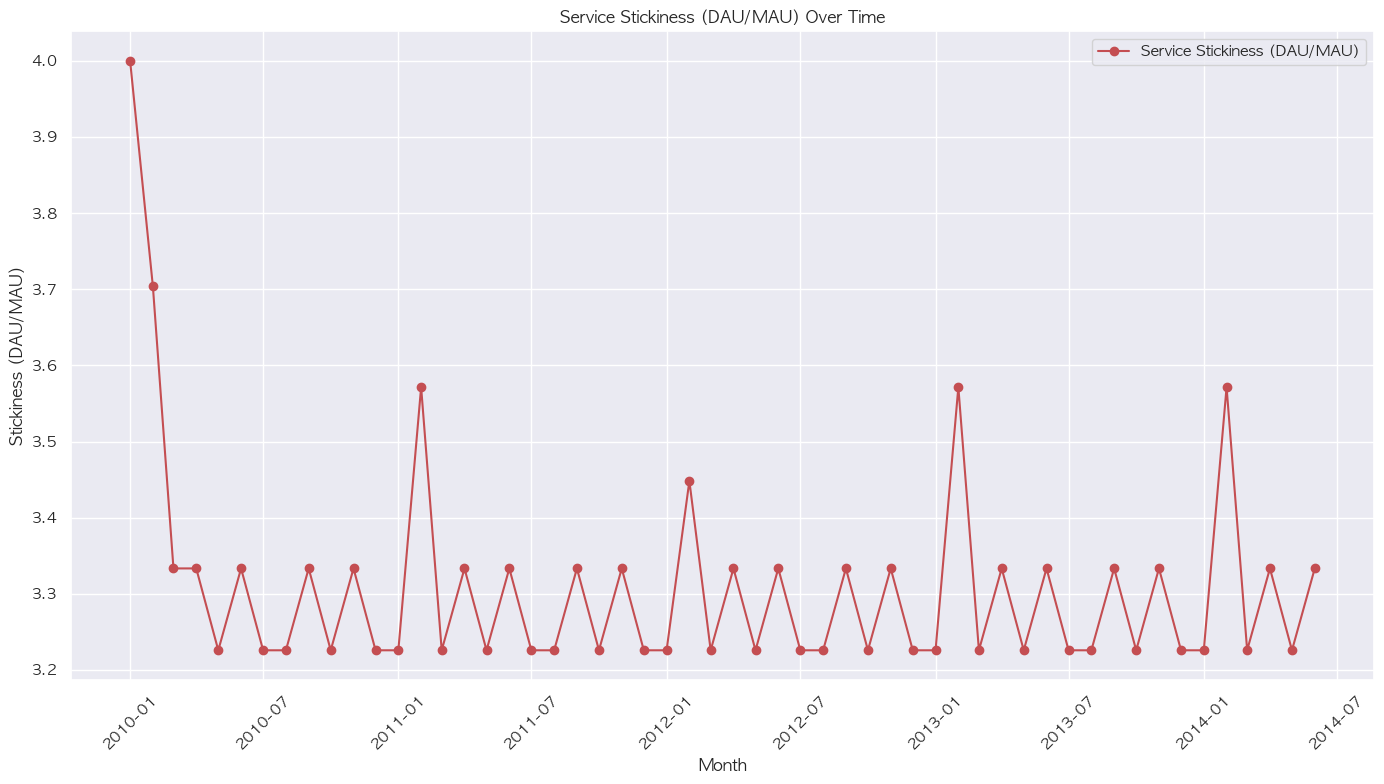

In [18]:
# 그래프 설정 및 시각화
plt.figure(figsize=(14, 8))

# 서비스 고착도 플로팅
plt.plot(stickiness_monthly['month'], stickiness_monthly['stickiness'], marker='o', linestyle='-', color='r', label='Service Stickiness (DAU/MAU)')

# 그래프 제목과 축 레이블 설정
plt.title('Service Stickiness (DAU/MAU) Over Time')
plt.xlabel('Month')
plt.ylabel('Stickiness (DAU/MAU)')

# x 축 레이블 각도 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()

- 2010년 1월의 고착도가 4.0으로 시작한 후 점차적으로 3.2~3.3 수준으로 감소하여 유지되고 있다. 이러한 감소는 초기에 높은 관심을 받았지만, 시간이 지남에 따라 사용자 참여가 다소 감소했음을 시사하고 있다. 
- 매년 2월에 상대적으로 높은 고착도를 보이고 있다. 이는 특정 이벤트나 업데이트가 사용자 참여를 촉진했을 가능성을 나타낸다. 